# Homework 

During the exercise you will be using the data from the 1987 National Indonesia Contraceptive Prevalence Survey. The detailed description of the dataset can be found at [UCI ML Repository website](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice). Read the raw data from the following URL: [https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data](https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data)

Your tasks are as follows:

- Identify the format of the raw data and read it into a dataframe correctly. Remember to provide a list of meaningful attribute names
- Normalize the `Age` attribute
- Remove the column containing the information about religion
- Create a second dataframe containig only women with highest degree of education
- Recode the `Wife working now` attribute, changing 0 to 'no' and 1 to 'yes'
- Compute the frequency of contraceptive methods grouping by the woman's education level
- Create a new column which will contain the average degree of education between a wife and a husband
- Create a new binary column which will indicate if a given woman has given birth to more than the average number of children
- Change `Standard of living` column into an ordered category
- Recode `Wife's education` attribute into a set of binary attributes using dummy variables
- Plot the histogram of the number of children
- Plot the bar chart of the standard of living


In [58]:
import pandas as pd

# Identify the format of the raw data and read it into a dataframe correctly. Remember to provide a list of meaningful attribute names

columns = ['wife_age', 'wife_edu', 'husb_edu', 'num_children', 'wife_religion', 'wife_work', 'husb_occupation', 'standard_of_living', 'media_exposure', 'contraceptive']

cmc_dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data', names=columns)

In [59]:
cmc_dataset.head()

,wife_age,wife_edu,husb_edu,num_children,wife_religion,wife_work,husb_occupation,standard_of_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [60]:
# Normalize the `Age` attribute

cmc_dataset['wife_age'] = (cmc_dataset['wife_age'] - cmc_dataset['wife_age'].min()) / (cmc_dataset['wife_age'].max() - cmc_dataset['wife_age'].min())

In [61]:
# Remove the column containing the information about religion

cmc_dataset = cmc_dataset.drop(columns=['wife_religion'])

In [62]:
# Create a second dataframe containig only women with highest degree of education

cmc_high_education = cmc_dataset[cmc_dataset['wife_edu'] == cmc_dataset['wife_edu'].max()]

In [63]:
cmc_high_education.head()

,wife_age,wife_edu,husb_edu,num_children,wife_work,husb_occupation,standard_of_living,media_exposure,contraceptive
5,0.090909,4,4,0,1,3,3,0,1
12,0.848485,4,4,1,0,1,4,0,1
22,0.909091,4,4,1,1,1,4,0,1
23,0.696970,4,4,1,1,1,4,0,1
24,0.969697,4,4,5,1,1,4,0,1


In [64]:
# Recode the `Wife working now` attribute, changing 0 to 'no' and 1 to 'yes'

cmc_dataset['wife_work'] = cmc_dataset['wife_work'].map({0: 'no', 1: 'yes'})

In [65]:
# Compute the frequency of contraceptive methods grouping by the woman's education level

cmc_dataset.groupby('wife_edu').agg({'contraceptive': 'count'})

,contraceptive
wife_edu,
1,152
2,334
3,410
4,577


In [66]:
# Create a new column which will contain the average degree of education between a wife and a husband

cmc_dataset['avg_edu'] = cmc_dataset[['wife_edu', 'husb_edu']].mean(axis=1)


In [67]:
 # Create a new binary column which will indicate if a given woman has given birth to more than the average number of children

cmc_dataset['above_avg_tfr'] = cmc_dataset['num_children'] > cmc_dataset['num_children'].mean()

cmc_dataset.head()


,wife_age,wife_edu,husb_edu,num_children,wife_work,husb_occupation,standard_of_living,media_exposure,contraceptive,avg_edu,above_avg_tfr
0,0.242424,2,3,3,yes,2,3,0,1,2.5,False
1,0.878788,1,3,10,yes,3,4,0,1,2.0,True
2,0.818182,2,3,7,yes,3,4,0,1,2.5,True
3,0.787879,3,2,9,yes,3,3,0,1,2.5,True
4,0.606061,3,3,8,yes,3,2,0,1,3.0,True


In [68]:
# Change `Standard of living` column into an ordered category

from pandas.api.types import CategoricalDtype

standards = sorted(cmc_dataset['standard_of_living'].unique())

cmc_dataset['standard_of_living'] = cmc_dataset['standard_of_living'].astype(CategoricalDtype(categories=standards, ordered=True))


In [69]:
# Recode `Wife's education` attribute into a set of binary attributes using dummy variables

cmc_dataset = pd.get_dummies(cmc_dataset, columns=['wife_edu'])

In [70]:
cmc_dataset.head()

,wife_age,husb_edu,num_children,wife_work,husb_occupation,standard_of_living,media_exposure,contraceptive,avg_edu,above_avg_tfr,wife_edu_1,wife_edu_2,wife_edu_3,wife_edu_4
0,0.242424,3,3,yes,2,3,0,1,2.5,False,False,True,False,False
1,0.878788,3,10,yes,3,4,0,1,2.0,True,True,False,False,False
2,0.818182,3,7,yes,3,4,0,1,2.5,True,False,True,False,False
3,0.787879,2,9,yes,3,3,0,1,2.5,True,False,False,True,False
4,0.606061,3,8,yes,3,2,0,1,3.0,True,False,False,True,False


<Axes: ylabel='Frequency'>

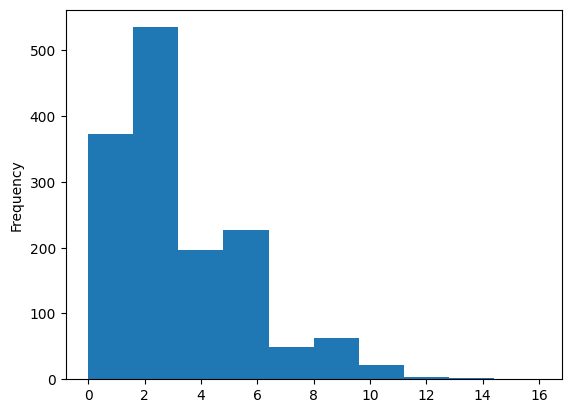

In [71]:
# Plot the histogram of the number of children

%matplotlib inline

cmc_dataset.num_children.plot(kind='hist')


<Axes: xlabel='standard_of_living'>

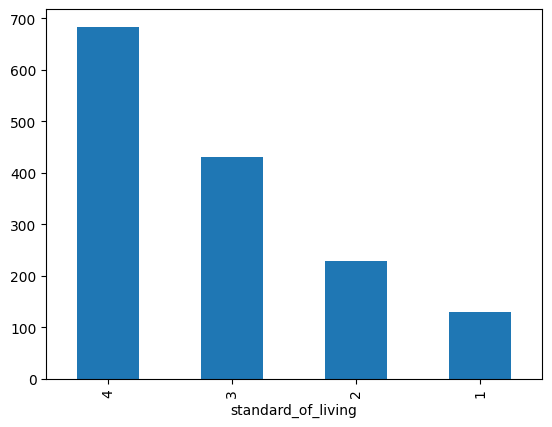

In [72]:
# Plot the bar chart of the standard of living

cmc_dataset.standard_of_living.value_counts().plot(kind='bar')